# Bias Variance Tradeoff

1.  Переобучение (overfitting) – явление, когда ошибка на тестовой выборке заметно больше ошибки на обучающей.

2.  Недообучение (underfitting) – явление, когда ошибка на обучающей выборке достаточно большая, иными словами очень простая модель.

3.  Сложность (complexity) модели – оценка, насколько разнообразны алгоритмы в модели. Повышение сложности (т.е. использование более сложных моделей) решает проблему недообучения и вызывает переобучение.

Рассмотрим на примере недообучение и переобучение

Попытаемся обучить три разных линейных модели: признаки для первой — $\left\{{x}\right\}$, для второй — $\left\{{x, x^2, x^3, x^4}\right\}$, для третьей — $\left\{{x, ... , x^{20}}\right\}$.

In [2]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline
sns.set(style="darkgrid")

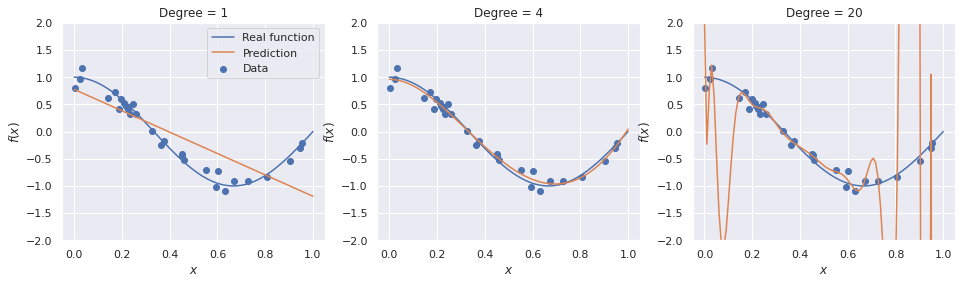

In [3]:
np.random.seed(36)
x = np.linspace(0, 1, 100)
y = np.cos(1.5 * np.pi * x)

x_objects = np.random.uniform(0, 1, size=30)
y_objects = np.cos(1.5 * np.pi * x_objects) + np.random.normal(scale=0.1, size=x_objects.shape)

from sklearn.preprocessing import PolynomialFeatures
fig, axs = plt.subplots(figsize=(16, 4), ncols=3)
for i, degree in enumerate([1, 4, 20]):
    X_objects = PolynomialFeatures(degree, include_bias=False).fit_transform(x_objects[:, None])
    X = PolynomialFeatures(degree, include_bias=False).fit_transform(x[:, None])
    regr = LinearRegression().fit(X_objects, y_objects)
    y_pred = regr.predict(X)
    axs[i].plot(x, y, label="Real function")
    axs[i].scatter(x_objects, y_objects, label="Data")
    axs[i].plot(x, y_pred, label="Prediction")
    if i == 0:
        axs[i].legend()
    axs[i].set_title("Degree = %d" % degree)
    axs[i].set_xlabel("$x$")
    axs[i].set_ylabel("$f(x)$")
    axs[i].set_ylim(-2, 2)

Видно, что полином первой степени явно плохо подходит для описания целевой зависимости, четвёртой – достаточно хорошо её описывает, хотя ошибки есть, двадцатой – идеально проходит через точки обучающей выборки, но совсем не похож на «естественную функцию» и существенно отклоняется от целевой зависимости в остальных точках.

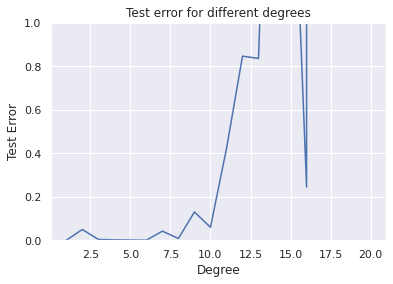

In [23]:
np.random.seed(36)
x = np.linspace(0, 1, 100)
y = np.cos(1.5 * np.pi * x)

x_objects = np.random.uniform(0, 1, size=30)
y_objects = np.cos(1.5 * np.pi * x_objects) + np.random.normal(scale=0.1, size=x_objects.shape)

degrees = [i for i in range(1, 21)]
error_train = []
error_test = []

for i, degree in enumerate(degrees):
    X_objects = PolynomialFeatures(degree, include_bias=False).fit_transform(x_objects[:, None])
    X = PolynomialFeatures(degree, include_bias=False).fit_transform(x[:, None])
    regr = LinearRegression().fit(X_objects, y_objects)
    y_pred_test = regr.predict(X)
    error_test.append((sum(y_pred_test-y)**2)/len(y))
plt.plot(degrees, error_test, label="test error")
plt.xlabel('Degree')
plt.ylabel('Test Error')
plt.title('Test error for different degrees')
plt.ylim(0, 1)
plt.show()

Видно, что с увеличением степени ошибка на тестовой сначала падает, потом возрастает.

**Теория**

В реальной жизни наша целевая зависимость выглядит следующим образом:

$y = y(x) = f(x) + ϵ, ϵ ∼ norm(0, σ^2)$

$y$ является результатом $x$ и случайного шума; шум моделируется случайной величиной $ϵ$ с нулевым средним значением и дисперсией $σ_ϵ^2$

Величина дисперсии представляет собой уровень разброса относительно целевого значения. Чем больше наш разброс, тем больше значение $σ_ϵ^2$. Математически $ϵ$ обладает следующими свойствами:

$E[ϵ] = 0, var(ϵ) = E[ϵ^2] = σ_ϵ^2$

Задача машинного обучения - найти такую функцию $\hat f$, которая максимально близка к истинной функции $f$. Функция $\hat f$ обучается с помощью минимизации функции потерь. Рассмотрим базовую функцию потерь линейной регрессии MSE:

$MSE = E[(y - \hat f(x))^2]$

**bias** (смещение) - это разница между средним прогнозом нашей модели и правильным значением, которое мы пытаемся предсказать. 

$bias[\hat f(x)] = E[\hat f(x)] - f(x)$

**variance** (разброс/дисперсия) - это ошибка чувствительности к малым отклонениям в тренировочном наборе, измеряет, насколько изменчивым является прогноз для различных обучающих наборов данных

$var(\hat f(x)) = E[(\hat f(x) - E[\hat f(x)])^2]$

Формула, которая связывает тестовую MSE со смещением, дисперсией и неустранимой ошибкой:

$E[E[(y - \hat f(x))^2]] = E[bias[\hat f(x)]^2] + E[var(\hat f(x))] + σ_ϵ^2$

Первое ожидание в термине $E[E[(y − \hat f(x))^2]]$ относится к распределению невидимых (тестовых) точек $x$, а второе - к распределению обучающих данных и случайной величины $ϵ$.

Вывод формулы:

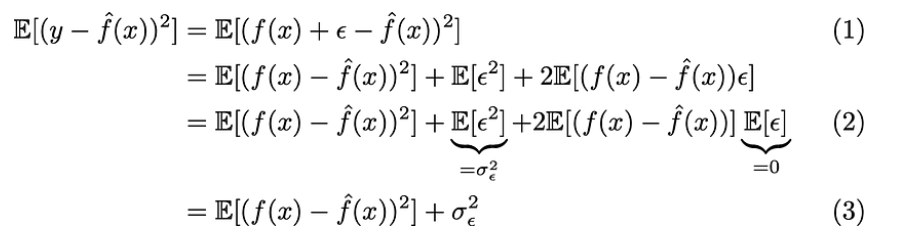
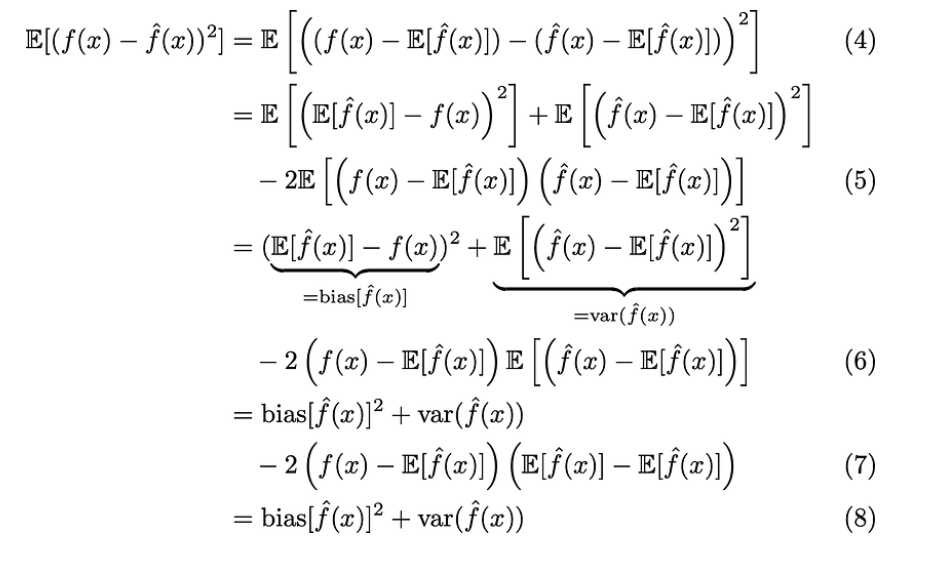

Объединяя уравнения (3) и (8) получаем:

$E[(y - \hat f(x))^2] = bias[\hat f(x)]^2 + var(\hat f(x)) + σ_ϵ^2$

Это выражение для данной конкретной точки. Поскольку обычно у нас набор контрольных точек это преобразуется в формулу, описанную выше:

$E[E[(y - \hat f(x))^2]] = E[bias[\hat f(x)]^2] + E[var(\hat f(x))] + σ_ϵ^2$

**Дилемма смещения-дисперсии**

В задачах машинного обучения мы стремимся к низкому смещению и низкой дисперсии. Однако проблема состоит в том, что когда мы уменьшаем смещение, увеличивается дисперсия и наоборот. 

Модель с высоким **смещением** очень мало внимания уделяет обучающим данным и чрезмерно упрощает модель. Это всегда приводит к высокой ошибке на обучающих и тестовых данных.

Модель с высокой дисперсией уделяет большое внимание обучающим данным и не обобщает данные, которые она раньше не видела.В результате такие модели очень хорошо работают на обучающих данных, но имеют высокий уровень ошибок на тестовых данных.

Эту проблему хорошо характеризует данные картинки:

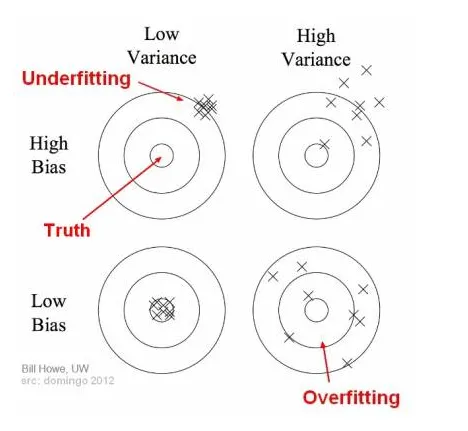

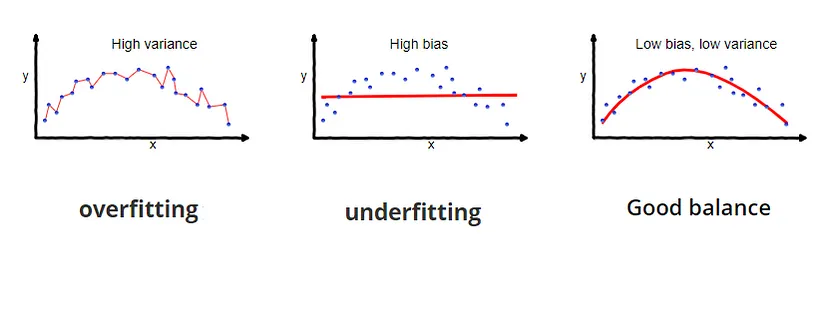

Если наша модель слишком проста и имеет очень мало параметров, она может иметь большое смещение и низкую дисперсию. С другой стороны, если наша модель имеет большое количество параметров, она будет иметь высокую дисперсию и низкое смещение. Поэтому нам нужно найти правильный баланс без переобучения и недообучения.

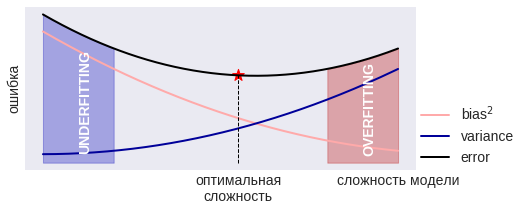

Способы борьбы с выскоим смещением и дисперсией:



*   Снижение размерности и отбор параметров (уменьшение дисперсии)
*   Регуляризация в линейных моделях (уменьшение дисперсии)
*   Добавление признаков (уменьшение смещения)
*   Смешанные модели и ансмабли
*   Опитмальный параметр k в KNN

